# <center> Hypothesis Testing <br>

## <center>One and Two Sample Tests for Means

## Null Hypothesis (H<sub>0</sub>)

No effect or no difference, the opposite of what you're looking to prove

## Alternative Hypothesis (H<sub>a</sub>)

There is an effect or difference, what you're interested in proving

### Example

<center>Is there a difference in average productivity for a 4 day work week versus a standard 5 day week?

### H<sub>0</sub>: Productivity(5 day) - Productivity(4 day) = 0

### H<sub>a</sub>: Productivity(5 day) - Productivity(4 day) != 0

## <center> How do we test our hypotheses?  <br>

## <center> p-values

<center> The probability of observing a test statistic.

The average number of scoops of ice cream sold by employees at Scoops Ahoy is 15 per hour with a standard deviation of 3. <br> <br>
Steve worked for 6 hours and averaged 18 scoops sold per hour.

<img src='z_test.jpg'>

The average number of scoops of ice cream sold by employees at Scoops Ahoy is 15 per hour with a standard deviation of 3. <br> <br>
Steve worked for 6 hours and averaged 18 scoops sold per hour.

In [1]:
import numpy as np 
from scipy import stats

In [15]:
x_bar = 18
mu = 15
sigma = 3
n = 6
z = (x_bar-mu)/(sigma/np.sqrt(n))
z

2.449489742783178

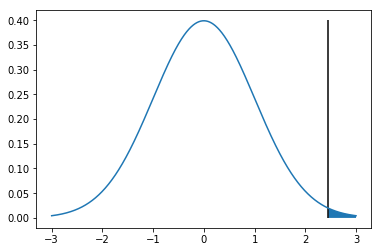

In [16]:
import matplotlib.pyplot as plt

x = np.linspace(-3,3,1000)
y = stats.norm.pdf(x, 0, 1)
z_ = x[x>z]
plt.plot(x, y)
plt.fill_between(z_, 0, stats.norm.pdf(z_, 0, 1))
plt.vlines(z,0,0.4)
plt.show()

In [17]:
p_value = 1-stats.norm.cdf(z)
p_value

0.007152939217714871

### What the p-value says... <br>

<center> If we picked a random employee and observed their performance for 6 hours, there is only a 0.7% chance that they would sell more scoops on average than Steve. <br> <br>

<div align='right'> ...so Steve is statistically pretty good at his job. </div>

## <center> Choosing the appropriate hypothesis test</center>

<img src='hypothesis_flow_chart.png' height=1500 width=1500>

The average annual earnings for an eSports athlete is 45,000 dollars with a standard deviation of 25,000 dollars. A recent study of 15 eSports atheletes found their average annual earnings to be 55,000 dollars. A rising eSports star is trying to decide whether or not to drop out of college and pursue as eSports career. His decision will be swayed over whether or not he could expect to make more than 45,000 dollars a year in eSports. Design a hypothesis test to inform his decision with a 95% confidence level.

### H<sub>0</sub>: Average Salary = 45,000

### H<sub>a</sub>: Average Salary > 45,000

In [401]:
alpha = 1-.95
x_bar = 55000
mu = 45000
sigma = 25000
n = 15
z = (x_bar-mu)/(sigma/np.sqrt(n))
z

1.5491933384829668

In [132]:
p_value = 1-stats.norm.cdf(z)
p_value

0.06066762517924107

In [133]:
alpha-p_value

-0.010667625179241025

Because the calculated p-value is greater than the alpha at the given confidence level, we fail to reject the null hypothesis. <br><br>
From this we can say that, despite the new study on eSports players, that the average salary of eSports atheletes is statistically unlikely to be greater than 45,000 dollars.

## <center> Two sample T-test

League of Legends and DOTA 2 are two similar multiplayer online battle arena games. There is a big debate over which game is better and which one requires more skill. To solve this question, two studies were ran using an IQ test. The first study looked at 55 League of Legends players and found their average IQ to be 116 with a standard deviation of 10. The second study looked at 45 DOTA 2 players and found their average IQ to be 112 with a standard deviation of 12. Assuming a confidence level of 90%, can these studies conclude that one playerbase is more intelligent than the other?

### H<sub>0</sub>: LoL IQ = DOTA IQ

### H<sub>a</sub>: LoL IQ != DOTA IQ

<img src='t_test.png'>

In [18]:
alpha = 0.1
x_bar1 = 116
x_bar2 = 112
sigma1 = 10
sigma2 = 12
n1 = 55
n2 = 45
mu1 = mu2 = 100
dof = n2-1

In [19]:
t = ((x_bar1-x_bar2) - (mu1-mu2)) / np.sqrt((sigma1**2/n1) + (sigma2**2/n2))
t

1.7856107630448046

In [20]:
1-stats.t.cdf(t,dof)

0.040527902787865666

## <center> One-tail vs Two-tail

<img src='hypo_test.jpeg'>

In [21]:
two_tail_p_value = (1-stats.t.cdf(t,dof))*2
two_tail_p_value

0.08105580557573133

In [22]:
alpha - two_tail_p_value

0.018944194424268673

Since the two-tail p-value is less than the chosen alpha level, we can safely reject the null hypothesis and accept the alternative hypothesis.

Based on these studies, we can conclude that the IQ of League of Legends players is statistically higher than the IQ of DOTA 2 players.

1) Determine the null hypothesis, alternative hypothesis, and whether it will be a one-tail or two-tail test. <br><br>
2) Collect and summarize the data into a test statistic.  <br><br>
3) Use the test statistic to determine the p-value.  <br><br>
4) Compare the p-value to the chosen alpha level. If p-value is less than alpha, reject the null hypothesis, else fail to reject the null-hypothesis.

# <center> Activity

### 1)
A large amount of game data was collected on League of Legends games and can be found in games.csv which is accepted to be an accurate representation of all matches. <br>
You suspect that professional matches have a different average game length. You decide to collect data on some professional matches compare their match statistics to see if there is a difference in game length. Those poll results can be found in league_poll_data.csv. <br>
Design and complete a hypothesis test to answer this question with a confidence level of 95%. <br>
<b>Hint:</b> Make sure your variables are always in the same units.

### H<sub>0</sub>: Match Length All - Match Length Pro = 0

### H<sub>a</sub>: Match Length All - Match Length Pro != 0

In [23]:
import pandas as pd
import seaborn as sns

In [24]:
df = pd.read_csv('games.csv')
df.head(5)

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


In [25]:
poll = pd.read_csv('league_poll_data.csv')
poll.head(5)

,Game ID,Game Length(minutes)
0,1,46.483314
1,2,36.476108
2,3,25.267589
3,4,28.377156
4,5,45.339202


C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


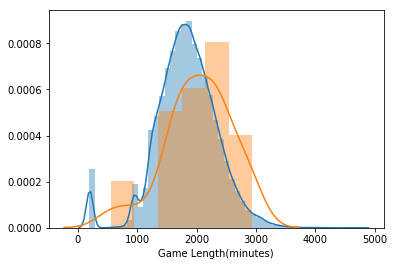

In [26]:
sns.distplot(df['gameDuration'])
sns.distplot(poll['Game Length(minutes)']*60)

In [27]:
alpha = 0.05
x_bar = poll['Game Length(minutes)'].mean()
mu = df['gameDuration'].mean()/60
sigma = df['gameDuration'].std()/60
n = len(poll)
z = (x_bar-mu)/(sigma/np.sqrt(n))
z

1.927428231621759

In [28]:
p_value = (1-stats.norm.cdf(z))*2
p_value

0.0539262841078636

In [29]:
alpha - p_value

-0.003926284107863595

Since the p-value is greater than the chosen alpha, we fail to reject the null hypothesis. We can conclude that the poll data does not indicate a change in average game length.

### 2)
You hypothesize that two different characters in League of Legends have different effects on the average game length. You want to prove that games with the character Nasus last longer on average than games with Teemo with a confidence level of 95%. Use the data in nasus.csv and teemo.csv to complete the appropriate hypothesis test. <br>
<b>Hint:</b> Remember that sample standard deviation has a slightly different formula.

### H<sub>0</sub>: Nasus_duration - Teemo_duration = 0 

### H<sub>a</sub>: Nasus_duration - Teemo_duration > 0

In [394]:
nasus_df = pd.read_csv('nasus.csv')
teemo_df = pd.read_csv('teemo.csv')

C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


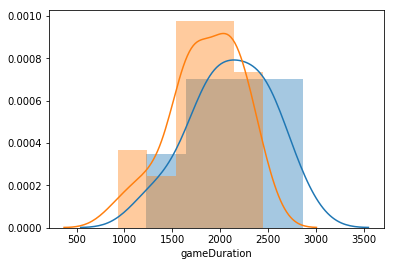

In [395]:
sns.distplot(nasus_df['gameDuration'])
sns.distplot(teemo_df['gameDuration'])

In [396]:
alpha = 0.05
x_bar1 = nasus_df['gameDuration'].mean()
x_bar2 = teemo_df['gameDuration'].mean()
sigma1 = np.std(nasus_df['gameDuration'], ddof=1)
sigma2 = np.std(teemo_df['gameDuration'], ddof=1)
n1 = len(nasus_df)
n2 = len(teemo_df)
mu1 = mu2 = 100
dof = n1-1 if n1<n2 else n2-1

In [397]:
t = ((x_bar1-x_bar2) - (mu1-mu2)) / np.sqrt((sigma1**2/n1) + (sigma2**2/n2))
t

2.4586370793125045

In [398]:
1-stats.t.cdf(t,dof)

0.010460283765653555